# Project: Classification - Loan Eligibility Prediction

Welcome to the project on classification. We will use the credit risk dataset for this problem.

----------------
## Context:
----------------

Credit risk is the risk of loss resulting from the failure by a borrower to repay the principal and interest owed to the lender. The lender uses the interest payments from the loan to compensate for the risk of potential losses. When the borrower defaults on his/her obligations, it causes an interruption in the cash flow of the lender.

In the banking sector, this is an important factor to be considered before approving the loan of an applicant in order to cushion the lender from loss of cash flow and reduce the severity of losses.

------------------
## Objective:
------------------

Easy House is a finance company that deals in several varieties of home loans. They have a presence across urban, semi-urban, and rural areas. Currently, the customer first applies for a home loan post which the company validates the customer's eligibility for that loan.

Now, the company wants to automate the loan eligibility process. They want to harness their past customers' data to build a model to predict whether the loan should be approved or not. This would help the company prevent potential losses, save time and focus more on eligible customers.

--------------------------
## Data Dictionary:
--------------------------

The data contains the following attributes:

* **Loan_ID**: Unique Loan ID
* **Gender**: Gender of the applicant - Male/Female
* **Married**: Whether the applicant is married or not (Yes/No)
* **Dependents**: Number of dependents of the applicant
* **Education**: Applicant's education (Graduate/Not Graduate)
* **Self_Employed**: Whether the applicant is self-employed (Yes/No)
* **ApplicantIncome**: The income of the applicant (\$)
* **CoapplicantIncome**: The co-applicant's income in case of a joint loan and 0 otherwise (\$)
* **LoanAmount**: Loan amount (dollars in thousands)
* **Loan_Amount_Term**: Term of loan in months
* **Credit_History**: Whether the applicant's credit history meets required guidelines
* **Property_Area**: The area the property pertaining to the loan belongs to - Urban/Semi-Urban/Rural
* **Loan_Status**: Loan approved (1 - Yes, 0 - No)

##Importing necessary libraries and overview of the dataset - Add libraries as needed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

#### Loading data

In [ ]:
# data = pd.read_csv("CreditRisk.csv")
# data.head()

import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1iZ9g3E-i6nAkM4Pzcqz27Ntz8z77DPgF/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


##Data information (data types, number of missing values, unique values for each variable)

In [ ]:
#Examining Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


* This DataFrame comprises data for 614 loan applicants, including various details about them.
* This data includes details like Gender, Marital status, Dependents, Education, Employement Type, Income, Loan amount, Credit history, and Property area, with some missing values in certain columns. So this data needs to be cleaned before building a model.




In [ ]:
#Unique values identification
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

* The unique value counts shows few variations in categorical features like Gender, Marital status,No of Dependents, Education, Self-employment status, Credit history, Property area, and Loan status.
*While numerical features such as income, loan amount, and loan term exhibit a range of values with differing frequencies.
* The Loan ID column in our data is a unique identifier and is not relevant for our analysis; thus, it can be removed from the data.





In [ ]:
#Data segregation into categorical and Numerical columns to perform the statistical summary analysis and to develop Histograms of all quantitative variables.
#Dropping Loan ID column as it is not relevant to our evaluation. It is just an ID for the Loan.
data=data.drop('Loan_ID', axis=1)
Categorical_Var = ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
Numerical_Var = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

#Data summaries (statistical summary of each variable)

In [ ]:
#statistical Summary for the numerical data. Univariate analysis of numerical columns
#(use '.T' for transposing the data)
data[Numerical_Var].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0


#Outliers Identification

<Axes: >

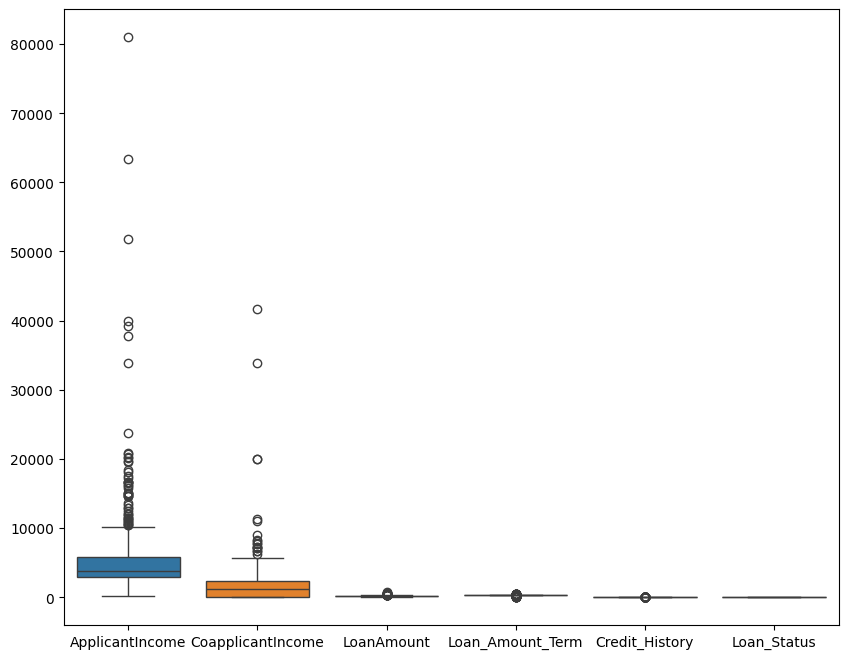

In [ ]:
## Checking the outliers
plt.figure(figsize=(10,8))
sns.boxplot(data = data)

#Histograms of all quantitative variables

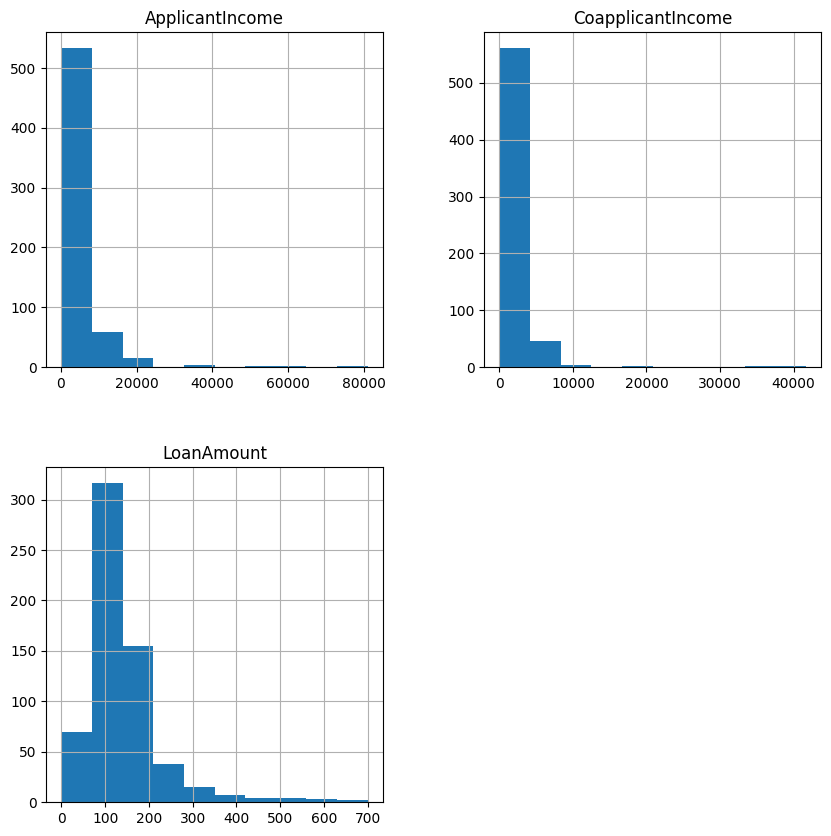

In [ ]:
#histogram plots for quantitaive variables. Exploring these variables in some more depth by observing their distributions.
data[Numerical_Var].hist(figsize=(10,10))
plt.show()

In [ ]:
#Printing the % sub categories of each category
for i in Categorical_Var:
    print(data[i].value_counts(normalize=True)) # This expresses the results as proportions rather than counts.
    print('*'*100)

Gender
Male      0.813644
Female    0.186356
Name: proportion, dtype: float64
****************************************************************************************************
Dependents
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: proportion, dtype: float64
****************************************************************************************************
Married
Yes    0.651391
No     0.348609
Name: proportion, dtype: float64
****************************************************************************************************
Education
Graduate        0.781759
Not Graduate    0.218241
Name: proportion, dtype: float64
****************************************************************************************************
Self_Employed
No     0.859107
Yes    0.140893
Name: proportion, dtype: float64
****************************************************************************************************
Loan_Amount_Term
360.0    0.853333
180.0    0.073333
480.0    0.0250

#Visuals for each categorical variable
We have analyzed different categorical and numerical variables.

Let's now check how does Loan_Status is related with other categorical variables

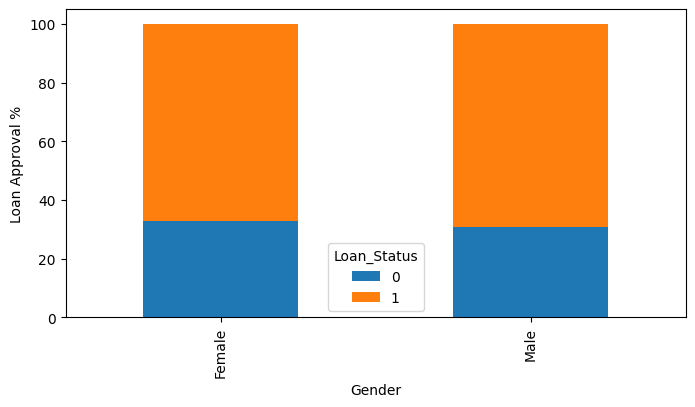

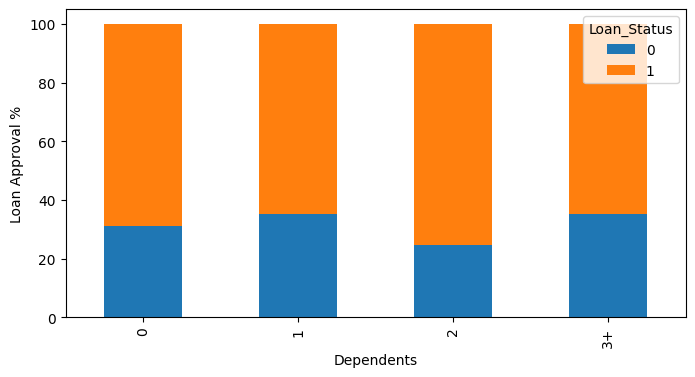

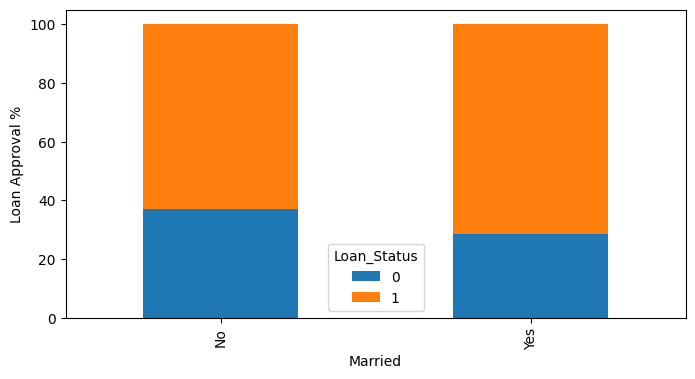

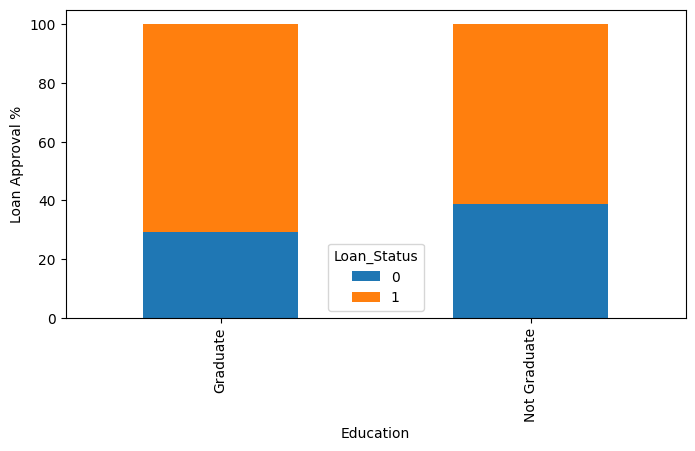

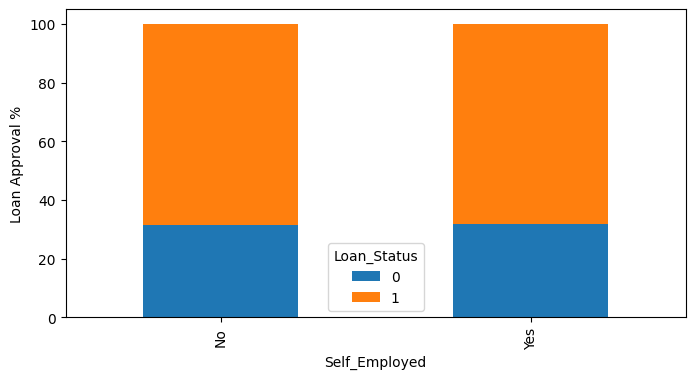

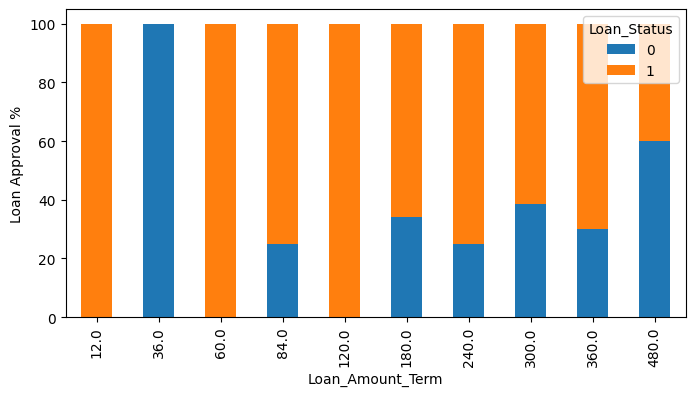

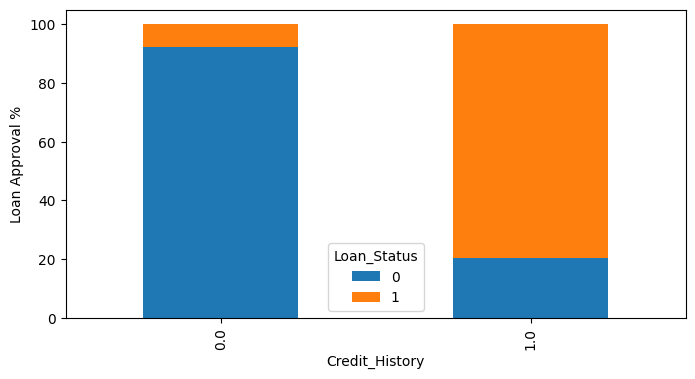

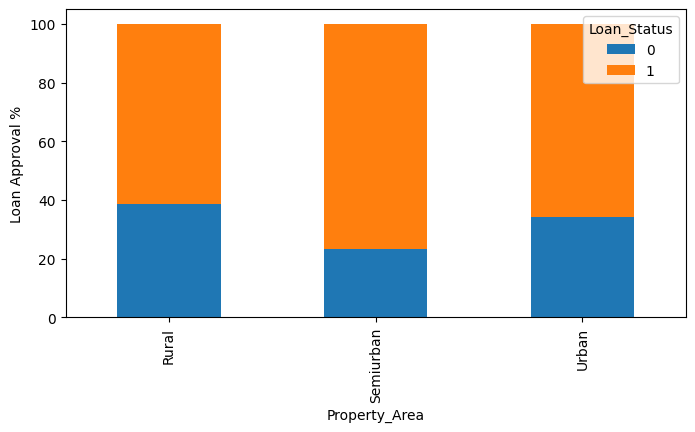

In [ ]:
#Plots for categorical columns
for i in Categorical_Var:
    if i!='Loan_Status':
        (pd.crosstab(data[i],data['Loan_Status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Loan Approval %')

Applicants who meet the specified credit history requirements have an approximately 80% chance of getting approved for a loan, whereas those without any credit history are unlikely to get approved. Additionally, applicants with loan terms of 60 months and 120 months have a notably high chance of loan approval, making these the top two influential factors affecting loan approval rates.

#Handling missing values
All of the missing data values are less that 20% of the total data. So, deleting all the records with blank values

In [ ]:
#Handling missing Data
Columns_With_Nulls = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
data.dropna(subset=Columns_With_Nulls, how='any', inplace=True)
#Data info after dropping null values
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             499 non-null    object 
 1   Married            499 non-null    object 
 2   Dependents         499 non-null    object 
 3   Education          499 non-null    object 
 4   Self_Employed      499 non-null    object 
 5   ApplicantIncome    499 non-null    int64  
 6   CoapplicantIncome  499 non-null    float64
 7   LoanAmount         499 non-null    int64  
 8   Loan_Amount_Term   499 non-null    float64
 9   Credit_History     499 non-null    float64
 10  Property_Area      499 non-null    object 
 11  Loan_Status        499 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 50.7+ KB


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Correlation matrix for the Numerical variables

<Axes: >

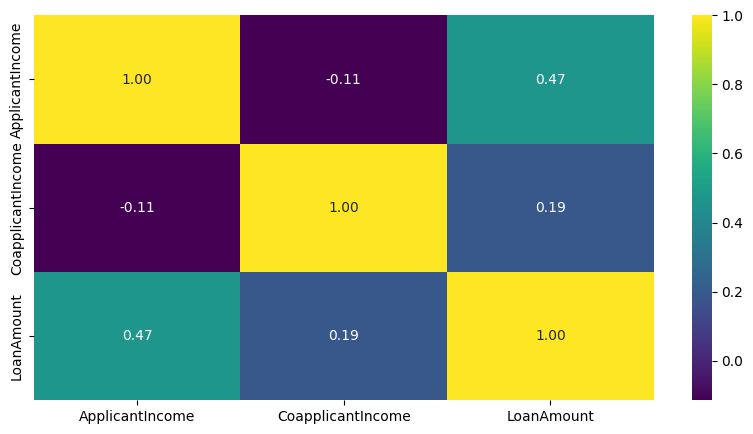

In [ ]:
#Correlation matrix for Quantitative data
plt.figure(figsize=(10,5))
sns.heatmap(data[Numerical_Var].corr(),annot=True, fmt='0.2f', cmap='viridis')

No two numerical variables are highly correlated to each other

In [ ]:
## Total Applicant Income
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1,6000.0


<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

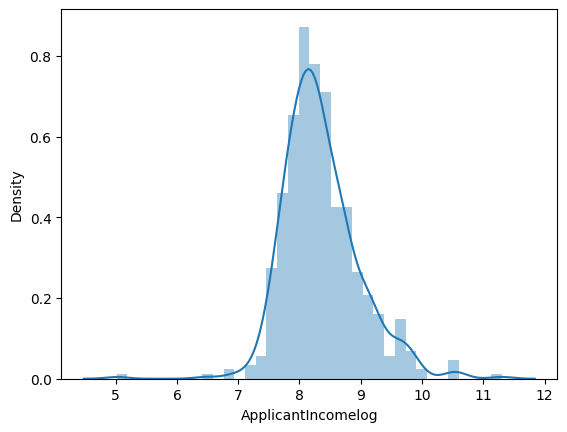

In [ ]:
## Apply Log Transformation for Application Imcome

data['ApplicantIncomelog'] = np.log(data['ApplicantIncome'] + 1)
sns.distplot(data['ApplicantIncomelog'])

<Axes: xlabel='LoanAmountlog', ylabel='Density'>

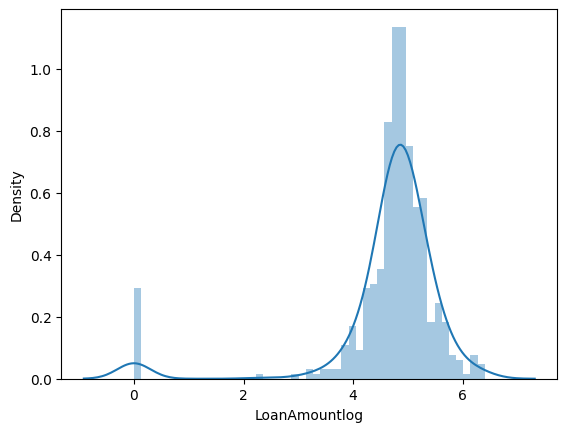

In [ ]:
## Apply Log Transformation for Loan Amount
data['LoanAmountlog'] = np.log(data['LoanAmount'] + 1)
sns.distplot(data['LoanAmountlog'])


In [ ]:
## Apply Log Transformation for Coapplicant Income
#data['Co-applicantIncomelog'] = np.log(data['CoapplicantIncome'] + 1)
#sns.distplot(data['Co-applicantIncomelog'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

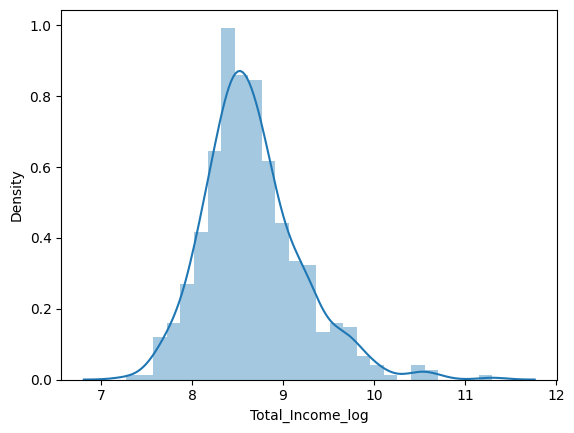

In [ ]:
## Apply Log Transformation for Total Income
data['Total_Income_log'] = np.log(data['Total_Income'] + 1)
sns.distplot(data['Total_Income_log'])

In [ ]:
## drop unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Total_Income']
data = data.drop(columns = cols, axis = 1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Total_Income_log
0,Male,No,0,Graduate,No,360.0,1.0,Urban,1,8.674197,0.000000,8.674197
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,0,8.430327,4.859812,8.714732
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,1,8.006701,4.204693,8.006701
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,1,7.857094,4.795791,8.505525
4,Male,No,0,Graduate,No,360.0,1.0,Urban,1,8.699681,4.955827,8.699681


#Converting categorical variables into numerical values using dummy variables

In [ ]:
#Creating Dummies for Categorical Variables
Cat_Into_Dummies = ['Gender', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Property_Area']
data = pd.get_dummies(data, columns=Cat_Into_Dummies, drop_first=False)
#The "married" column data can be simplified by converting "Yes" to 1 and "No" to 0, rather than creating separate columns for each option. This avoids redundant filling of 1s and 0s in additional columns.
married_conv = {'Yes': 1, 'No': 0}
data['Married'] = data['Married'].map(married_conv)

#Correlation matrix for the predictor variables

In [ ]:
# Correlation matrix
#plt.figure(figsize=(20,12))
#sns.heatmap(data.corr(),annot=True,fmt=".2f",cmap='cividis')
#plt.show()

#Separating the independent variables (X) and the dependent variable (Y)

In [ ]:
#Separating target variable and other independent variables
Y= data.Loan_Status
X= data.drop(columns = ['Loan_Status'])

#Data Scaling

In [ ]:
#Data scaling using Standard Scaler method
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

#Splitting the data into 70% train and 30% test set

In [ ]:
#Splitting data for test and train
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=1,stratify=Y)

#Function to calculate and print the classification report and confusion matrix

In [ ]:
#creating the metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    Confm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(Confm, annot=True,  fmt='.2f', xticklabels=['Loan_Status_N', 'Loan_Status_Y'], yticklabels=['Loan_Status_N', 'Loan_Status_Y'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#Decision Tree Classifier Model

In [ ]:
# Create Decision Tree classifer object
Loan_tree = DecisionTreeClassifier(class_weight={0:0.17,1:0.83}, random_state=1)

# Train Decision Tree Classifer
Loan_tree = Loan_tree.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = Loan_tree.predict(x_test)
y_pred[:6]

array([0, 0, 0, 1, 0, 1])

#Evaluating the Model performance on the train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       238

    accuracy                           1.00       349
   macro avg       1.00      1.00      1.00       349
weighted avg       1.00      1.00      1.00       349



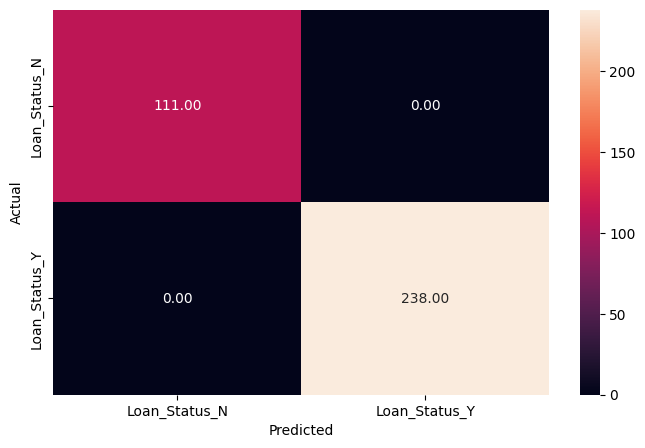

In [ ]:
#Model performace on training data
y_pred_train_Loan = Loan_tree.predict(x_train)
metrics_score(y_train, y_pred_train_Loan)

The results from the decision tree classifier show excellent performance on the training data, with perfect precision, recall, and F1-score for both classes, leading to an overall accuracy of 100%. However, these exceptional results could be a sign of overfitting, especially if the model hasn't been tested on an independent validation dataset. Overfitting occurs when a model learns the training data too well, capturing noise and outliers that may not generalize well to new, unseen data. Therefore, it's crucial to evaluate the model's performance on a separate test dataset to ensure its reliability and generalization ability.

#Evaluating the Model performance on the testing data

              precision    recall  f1-score   support

           0       0.58      0.62      0.60        47
           1       0.82      0.80      0.81       103

    accuracy                           0.74       150
   macro avg       0.70      0.71      0.70       150
weighted avg       0.74      0.74      0.74       150



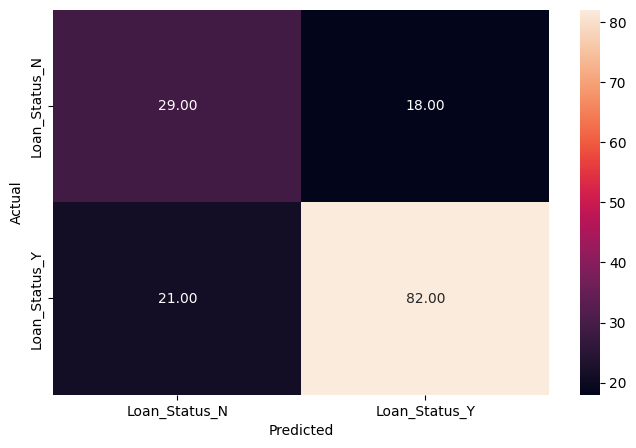

In [ ]:
y_pred_test_Loan = Loan_tree.predict(x_test)
metrics_score(y_test, y_pred_test_Loan)

The model achieves a moderate accuracy of 74% on the Test data. Upon analyzing the confusion matrix results of the test and training data, it's evident that the model's accuracy is lower on the test dataset than the training dataset.

This difference indicates potential overfitting, where the model performs well on the training data but has difficulty generalizing to new, unseen data. To mitigate this overfitting issue, we can utilize hyperparameter tuning techniques.

#Decision Tree Hyperparamter Tuning

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Performance on Training Data:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60       111
           1       0.79      1.00      0.88       238

    accuracy                           0.82       349
   macro avg       0.90      0.72      0.74       349
weighted avg       0.86      0.82      0.79       349



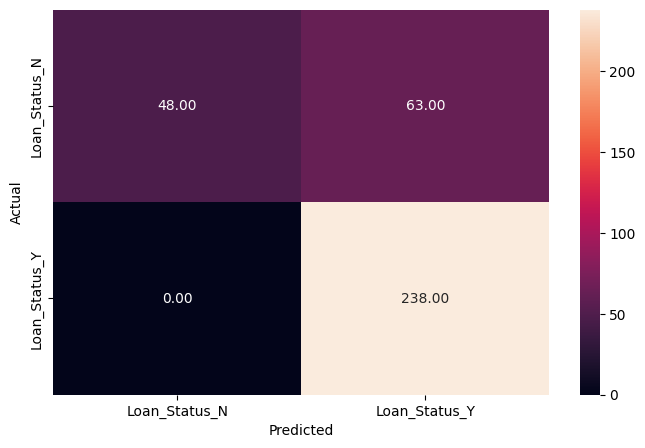

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.82      0.38      0.52        47
           1       0.77      0.96      0.86       103

    accuracy                           0.78       150
   macro avg       0.80      0.67      0.69       150
weighted avg       0.79      0.78      0.75       150



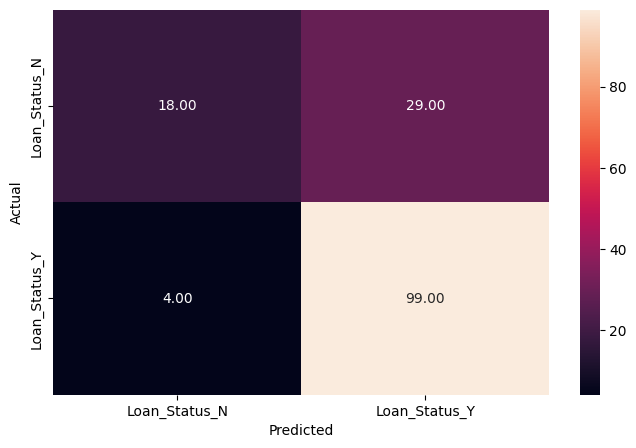

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create Decision Tree classifer object with hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Instantiate the Decision Tree model
dt_model = DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

# Set the clf to the best combination of parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train Decision Tree Classifer with the best hyperparameters
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(x_train, y_train)

# Checking performance on the training data
print("Performance on Training Data:")
y_pred_train_best = best_dt_model.predict(x_train)
metrics_score(y_train, y_pred_train_best)

# Checking performance on the test dataset
print("Performance on Test Data:")
y_pred_test_best = best_dt_model.predict(x_test)
metrics_score(y_test, y_pred_test_best)

The hyperparameter tuning notably enhanced the model's performance, as indicated by the improvements in accuracy (79%), precision, recall, and F1-score for both classes. Overall, this successfully addressed the overfitting issue and led to a more balanced and accurate Decision Tree model on the test data.



#Let's plot the feature importance and check the most important features:

<Axes: xlabel='Importance', ylabel='None'>

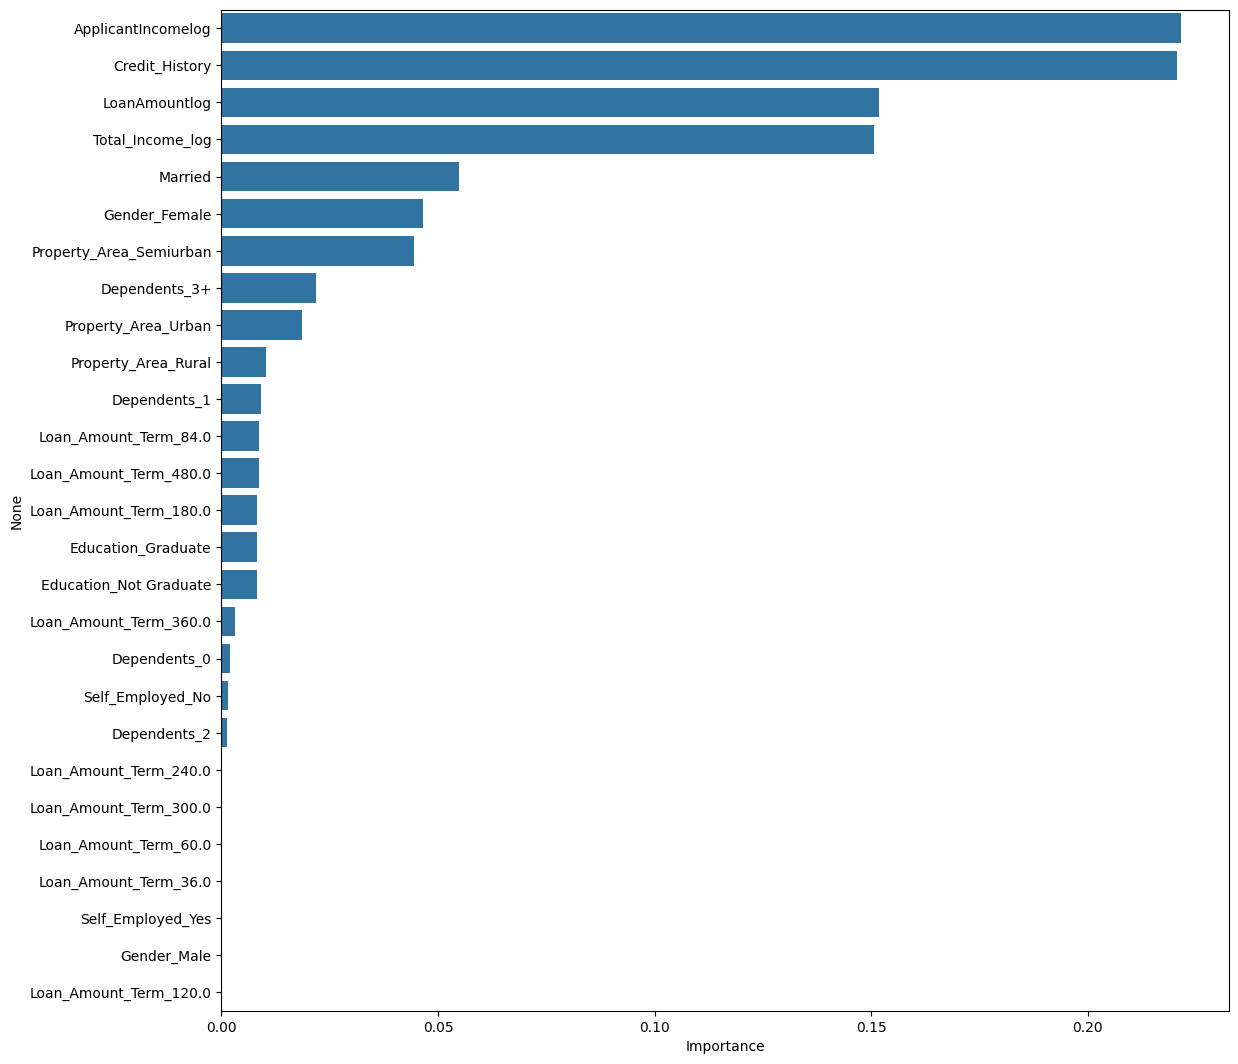

In [ ]:
#plotting the importance plot
importances = Loan_tree.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

The most important features, according to the model, are Applicant Income, Credit History, Loan Amount, Coapplicant Income, and Loan Amount Term. This makes sense, as a person's ability to repay a loan likely depends on their income, credit history, the amount of the loan, their spouse's income, and the length of the loan term.

#Model 2: Logistic Regression Model

Performance on Training Data:
              precision    recall  f1-score   support

           0       0.88      0.45      0.60       111
           1       0.79      0.97      0.87       238

    accuracy                           0.81       349
   macro avg       0.83      0.71      0.73       349
weighted avg       0.82      0.81      0.78       349



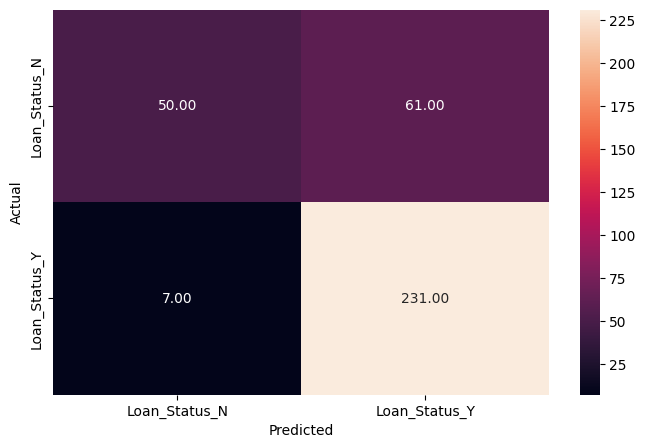

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.78      0.53      0.63        47
           1       0.81      0.93      0.87       103

    accuracy                           0.81       150
   macro avg       0.80      0.73      0.75       150
weighted avg       0.80      0.81      0.79       150



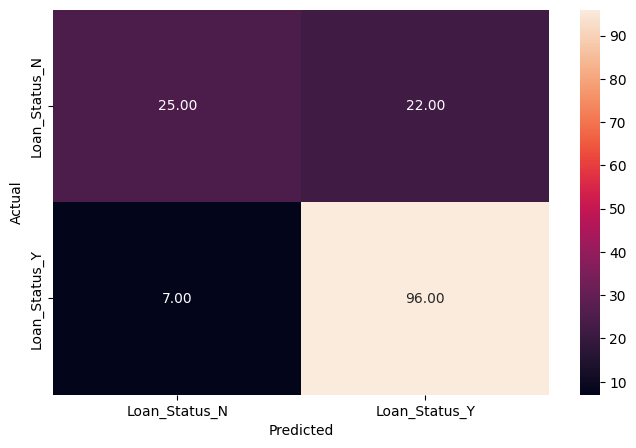

In [ ]:
#logistic regression model - Instantiate the model
lg=LogisticRegression()

# Train the model
lg.fit(x_train,y_train)

# Checking the performance on the training data
print("Performance on Training Data:")
y_pred_train = lg.predict(x_train)
metrics_score(y_train, y_pred_train)

# Checking the performance on the test dataset
print("Performance on Test Data:")
y_pred_test = lg.predict(x_test)
metrics_score(y_test,y_pred_test)

The model achieves an accuracy of 81% on both the training and test data, indicating a reasonable level of predictive performance.This suggests that the model can classify loan applications correctly in the majority of cases. Considering the balanced performance metrics and accuracy, this logistic regression model appears to be reasonably effective for loan approval decision-making

#Hyperparameter tuning on Logistic regression model

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Performance of Best Model on Test Data:
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        47
           1       0.82      0.97      0.89       103

    accuracy                           0.83       150
   macro avg       0.86      0.75      0.78       150
weighted avg       0.84      0.83      0.82       150



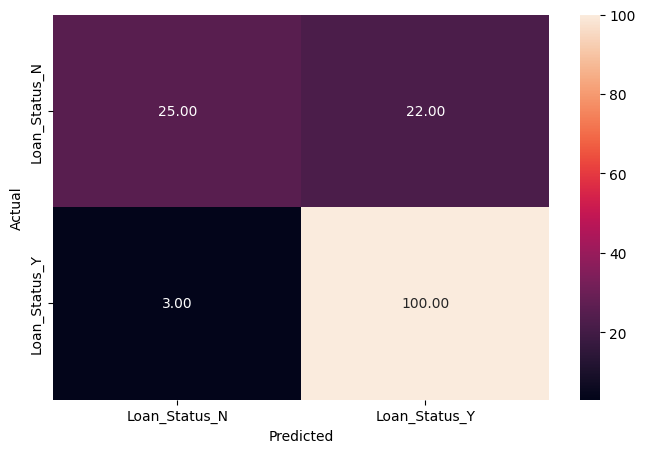

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their values to tune
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

# Instantiate the logistic regression model
lg_tuned = LogisticRegression()

# Instantiate GridSearchCV with the logistic regression model and hyperparameter grid
grid_search = GridSearchCV(estimator=lg_tuned, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Checking the performance of the best model on the test dataset
print("Performance of Best Model on Test Data:")
y_pred_best = best_model.predict(x_test)
metrics_score(y_test, y_pred_best)

#Feature Importance

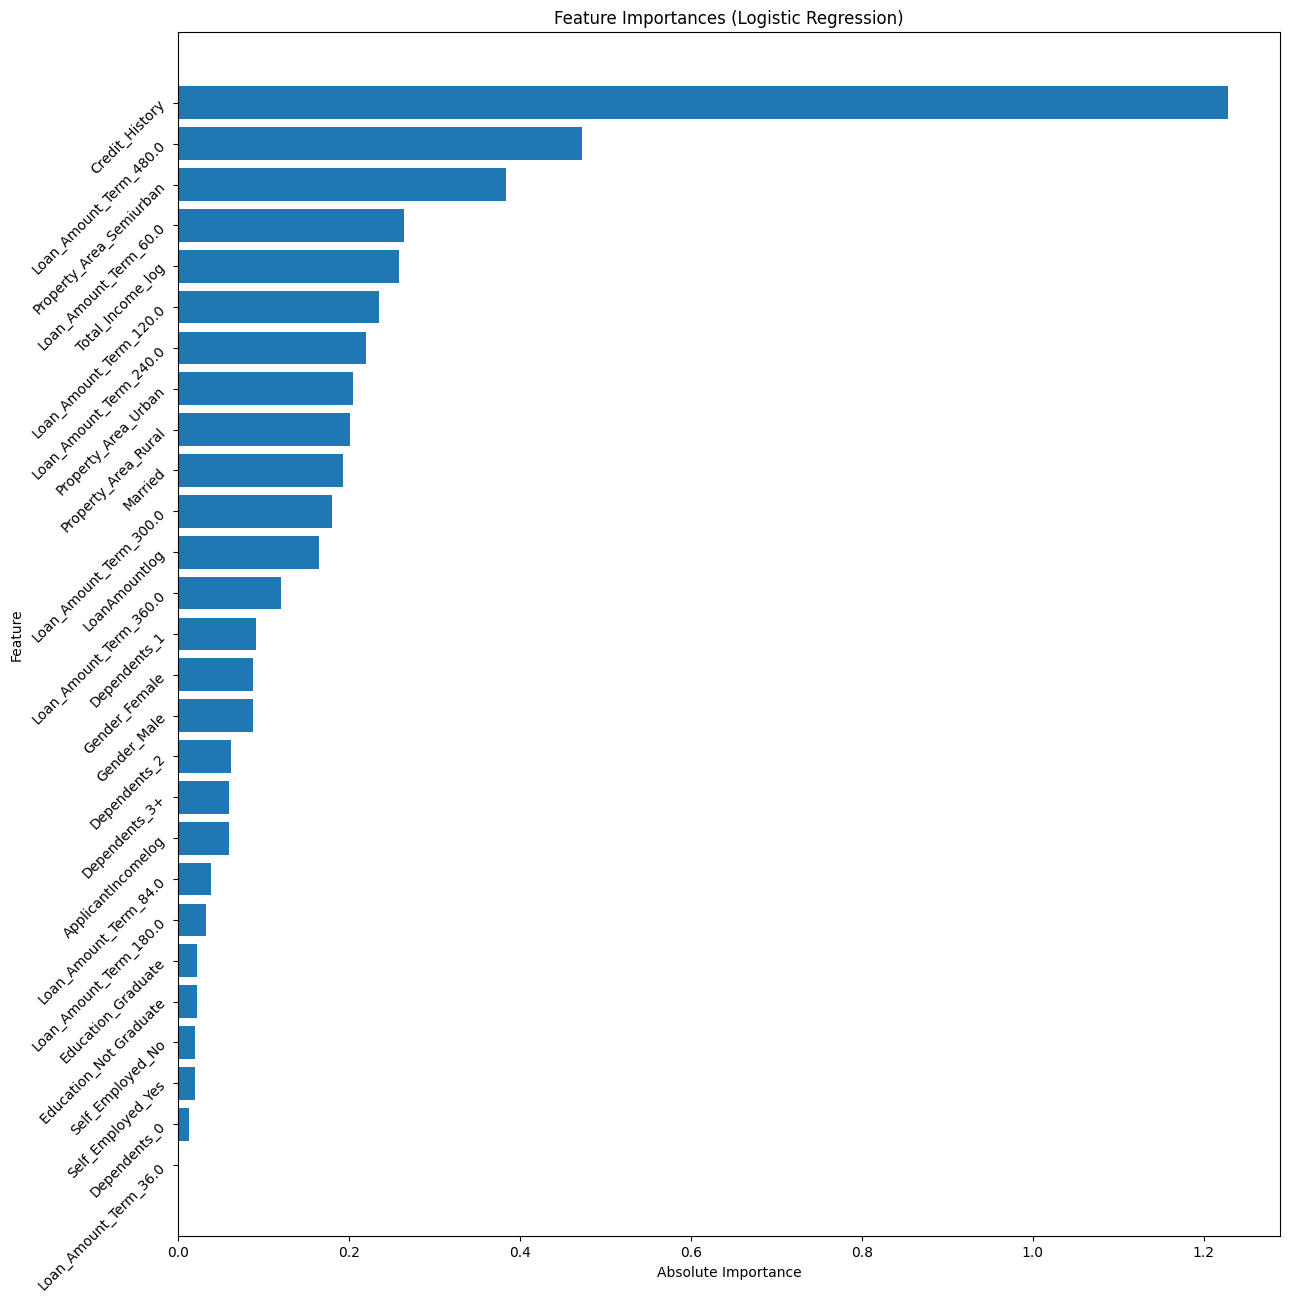

In [ ]:
# Get absolute feature coefficients
coefficients = np.abs(lg.coef_[0])
feature_names = X.columns

# Sort feature coefficients and corresponding feature names
indices = np.argsort(coefficients)[::-1]
sorted_coefficients = coefficients[indices]
sorted_coefficients_names = np.array(feature_names)[indices]

# Convert sorted_feature_names to a list
sorted_coefficients_names = sorted_coefficients_names.tolist()

# Plotting
plt.figure(figsize=(13, 13))
plt.barh(range(X.shape[1]), sorted_coefficients, align="center")
plt.yticks(range(X.shape[1]), sorted_coefficients_names, rotation=45, ha="right")
plt.ylabel("Feature")
plt.xlabel("Absolute Importance")
plt.title("Feature Importances (Logistic Regression)")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

#Logistic Regression Coefficients

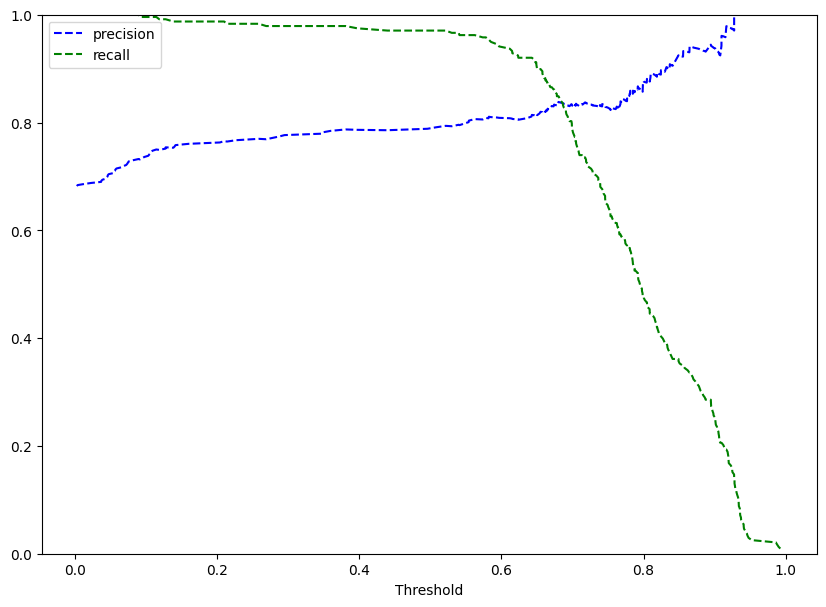

In [ ]:
# Printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

y_scores_lg=lg.predict_proba(x_train) #predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

#Let's find out the performance of the model at this threshold

In [ ]:
#optimal_threshold1=.70
#y_pred_train = lg.predict_proba(x_train)
#metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

In [ ]:
#optimal_threshold1=.70
#y_pred_test = lg.predict_proba(X_test)
#metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

#Model 3 - Support Vector Machines Model

Performance on Training Data:
              precision    recall  f1-score   support

           0       0.89      0.42      0.57       111
           1       0.78      0.97      0.87       238

    accuracy                           0.80       349
   macro avg       0.84      0.70      0.72       349
weighted avg       0.82      0.80      0.77       349



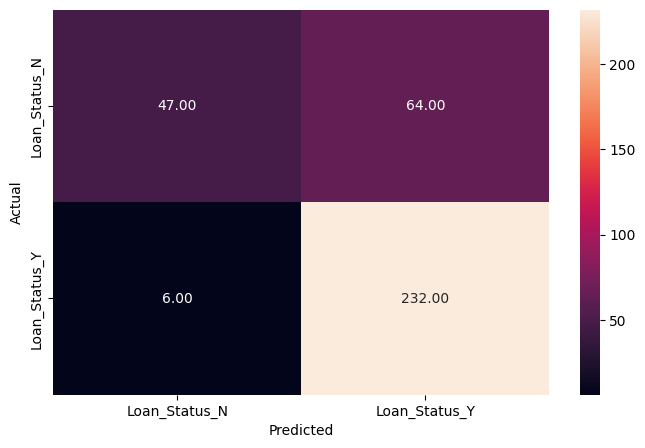

              precision    recall  f1-score   support

           0       0.83      0.53      0.65        47
           1       0.82      0.95      0.88       103

    accuracy                           0.82       150
   macro avg       0.82      0.74      0.76       150
weighted avg       0.82      0.82      0.81       150



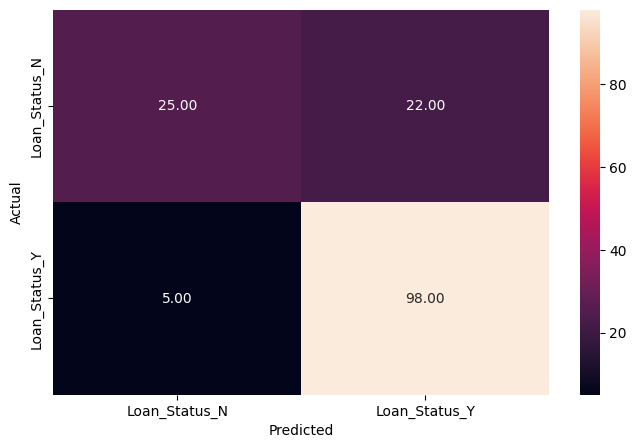

In [ ]:
from sklearn.svm import SVC

# Instantiate the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=1)

# Train the SVM model
svm_model.fit(x_train,y_train)

# Checking the performance on the training data
print("Performance on Training Data:")
y_pred_train_svm = svm_model.predict(x_train)
metrics_score(y_train, y_pred_train_svm)

#checking model performace of test data
y_pred_test_svm = svm_model.predict(x_test)
metrics_score(y_test, y_pred_test_svm)

#Hyperparameter Tuning on SVM

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Performance on Training Data with Tuned Model:
              precision    recall  f1-score   support

           0       0.89      0.42      0.57       111
           1       0.78      0.97      0.87       238

    accuracy                           0.80       349
   macro avg       0.84      0.70      0.72       349
weighted avg       0.82      0.80      0.77       349



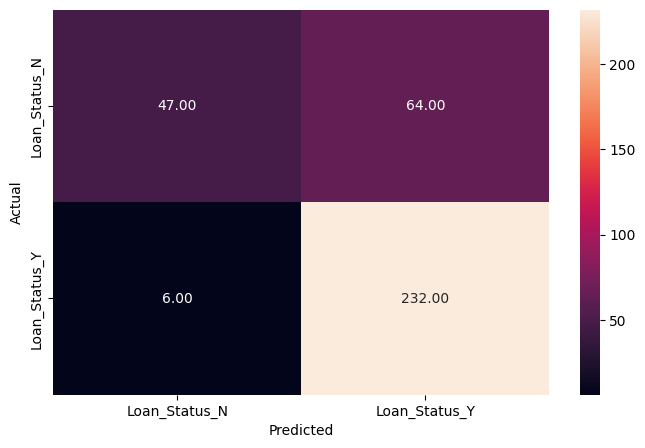

              precision    recall  f1-score   support

           0       0.83      0.53      0.65        47
           1       0.82      0.95      0.88       103

    accuracy                           0.82       150
   macro avg       0.82      0.74      0.76       150
weighted avg       0.82      0.82      0.81       150



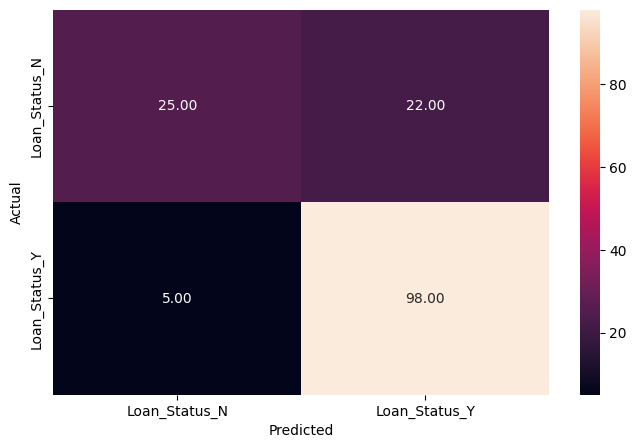

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the hyperparameters and their values to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Instantiate the SVM model
svm_model_tuned = SVC(random_state=1)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=svm_model_tuned, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV with training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Checking the performance on the training data with the best model
print("Performance on Training Data with Tuned Model:")
y_pred_train_tuned = best_model.predict(x_train)
metrics_score(y_train, y_pred_train_tuned)

# Checking model performance on the test data with the best model
y_pred_test_tuned = best_model.predict(x_test)
metrics_score(y_test, y_pred_test_tuned)


#Model 4 -Random Forest Classifier Model

              precision    recall  f1-score   support

           0       0.93      0.36      0.52       111
           1       0.77      0.99      0.86       238

    accuracy                           0.79       349
   macro avg       0.85      0.67      0.69       349
weighted avg       0.82      0.79      0.75       349



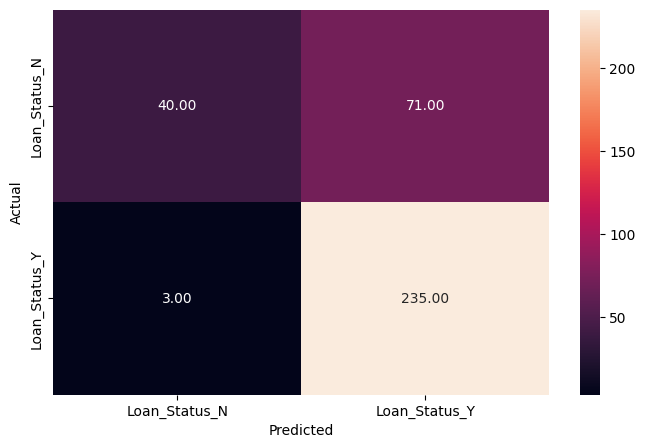

              precision    recall  f1-score   support

           0       0.91      0.45      0.60        47
           1       0.80      0.98      0.88       103

    accuracy                           0.81       150
   macro avg       0.85      0.71      0.74       150
weighted avg       0.83      0.81      0.79       150



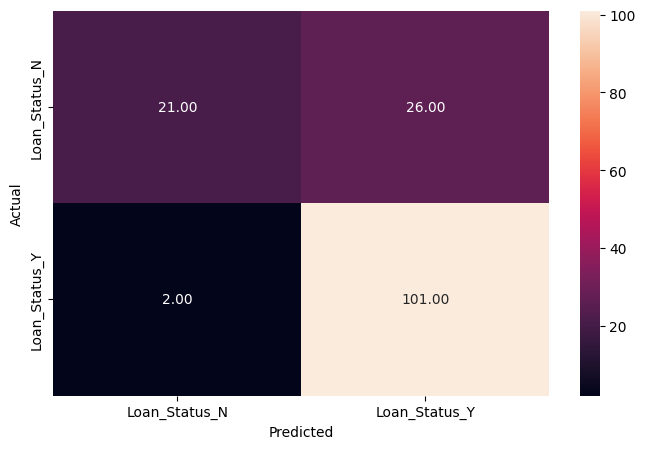

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)

#checking model performace of training data
y_pred_train_dt = rf_clf.predict(x_train)
metrics_score(y_train, y_pred_train_dt)

#checking model performace of test data
y_pred_test_dt = rf_clf.predict(x_test)
metrics_score(y_test, y_pred_test_dt)

#Hypertuning on Random Forest Classifier

Performance on Train Data (Tuned Random Forest Model):
              precision    recall  f1-score   support

           0       0.96      0.71      0.82       111
           1       0.88      0.99      0.93       238

    accuracy                           0.90       349
   macro avg       0.92      0.85      0.87       349
weighted avg       0.91      0.90      0.90       349



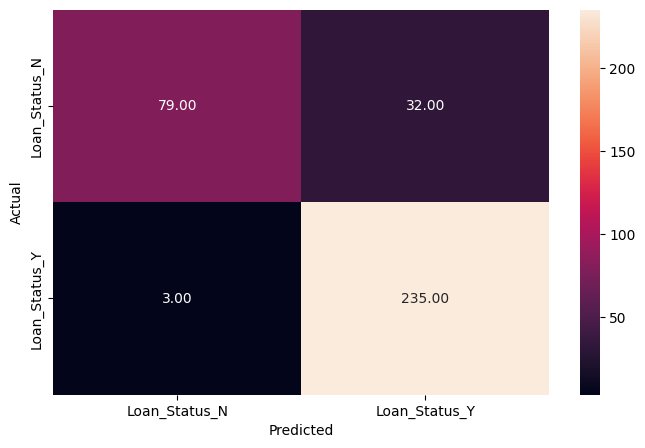

Performance on Test Data (Tuned Random Forest Model):
              precision    recall  f1-score   support

           0       0.83      0.51      0.63        47
           1       0.81      0.95      0.87       103

    accuracy                           0.81       150
   macro avg       0.82      0.73      0.75       150
weighted avg       0.82      0.81      0.80       150



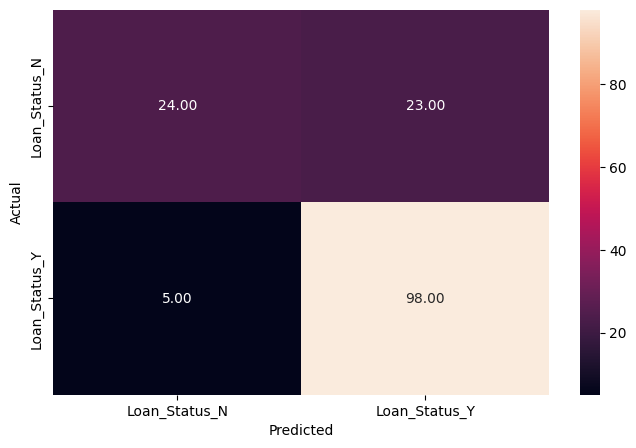

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# Instantiate the Random Forest model
rf_clf = RandomForestClassifier(random_state=1)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to train the final Random Forest model
best_rf_model = RandomForestClassifier(random_state=1, **best_params)
best_rf_model.fit(x_train, y_train)

# Checking the performance on the test dataset using the tuned model
print("Performance on Train Data (Tuned Random Forest Model):")
y_pred_train_rf_tuned = best_rf_model.predict(x_train)
metrics_score(y_train, y_pred_train_rf_tuned)

# Checking the performance on the test dataset using the tuned model
print("Performance on Test Data (Tuned Random Forest Model):")
y_pred_test_rf_tuned = best_rf_model.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned)

#Feature Importance of the Variables

Feature Importances:
                    Feature  Importance
1            Credit_History    0.276351
4          Total_Income_log    0.165095
2        ApplicantIncomelog    0.145938
3             LoanAmountlog    0.143770
25  Property_Area_Semiurban    0.028485
26      Property_Area_Urban    0.024160
0                   Married    0.022349
8              Dependents_1    0.018126
22   Loan_Amount_Term_360.0    0.016899
7              Dependents_0    0.016257
23   Loan_Amount_Term_480.0    0.015658
24      Property_Area_Rural    0.015498
9              Dependents_2    0.014821
12   Education_Not Graduate    0.013048
5             Gender_Female    0.012244
6               Gender_Male    0.012146
13         Self_Employed_No    0.012113
11       Education_Graduate    0.011600
14        Self_Employed_Yes    0.011417
21   Loan_Amount_Term_300.0    0.008790
19   Loan_Amount_Term_180.0    0.006986
10            Dependents_3+    0.006846
17    Loan_Amount_Term_84.0    0.001119
16    Loan_Amount_T

<Axes: xlabel='Importance', ylabel='None'>

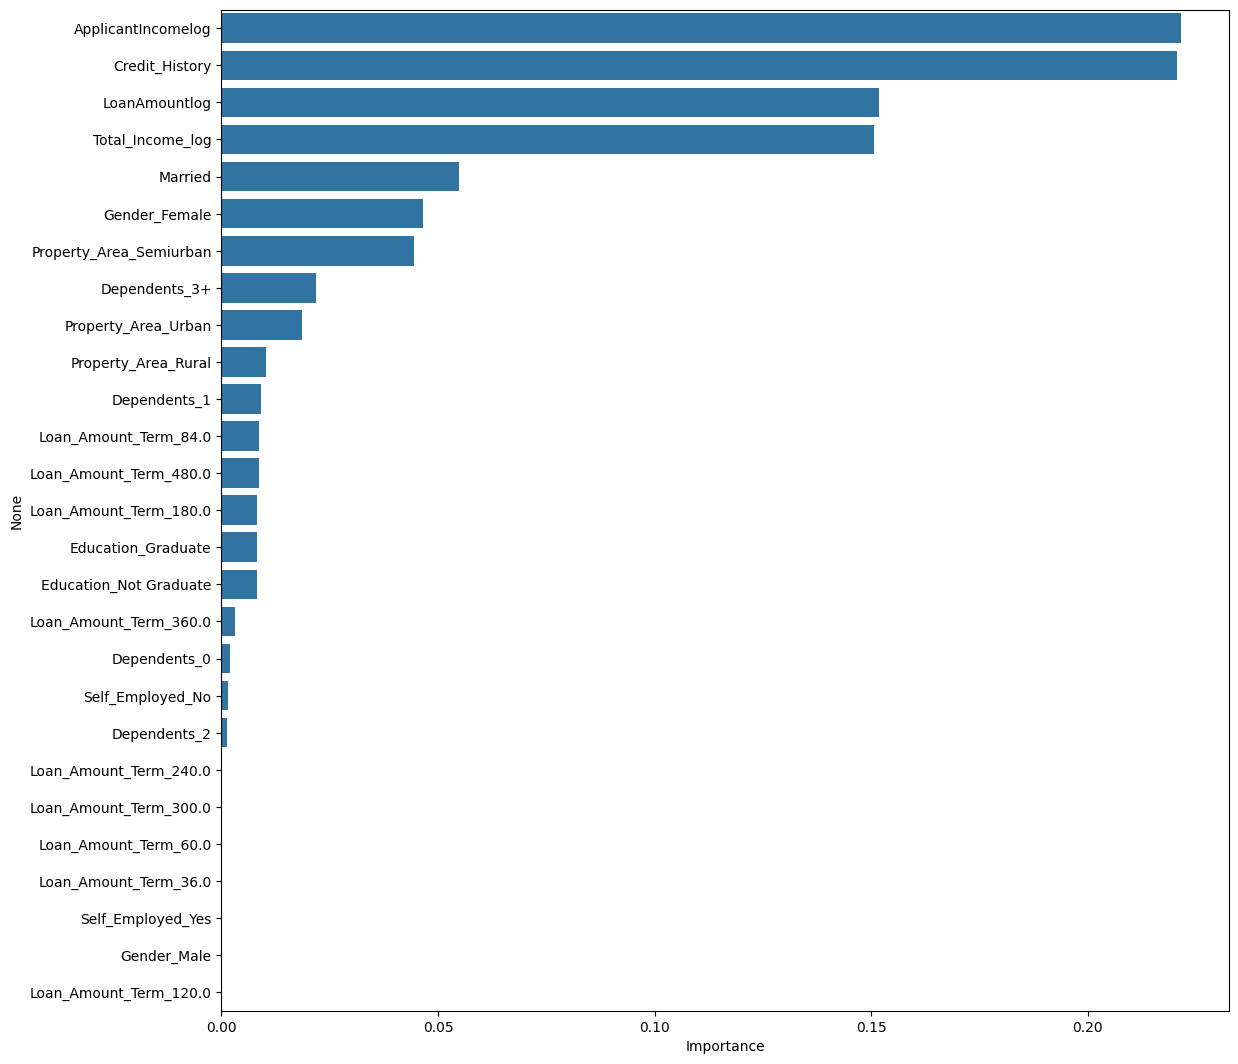

In [ ]:
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print("Feature Importances:")
print(importances_df)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)